# ML2. 지도학습

## 지도 학습 알고리즘을 활용하는 방법
- 데이터 불러오기
- 훈련데이터와 답안데이터로 나누기
- 데이터 살펴보기
- 모델 생성
- 예측 하기
- 모델 평가

In [33]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import koreanize_matplotlib

In [34]:
import mglearn
from preamble import *

### 데이터 확인

In [20]:
print(X,y)

[[ 9.963  4.597]
 [11.033 -0.168]
 [11.542  5.211]
 [ 8.693  1.543]
 [ 8.106  4.287]
 [ 8.31   4.806]
 [11.93   4.649]
 [ 9.673 -0.203]
 [ 8.348  5.134]
 [ 8.675  4.476]
 [ 9.177  5.093]
 [10.24   2.455]
 [ 8.689  1.487]
 [ 8.922 -0.64 ]
 [ 9.491  4.332]
 [ 9.257  5.133]
 [ 7.998  4.853]
 [ 8.184  1.296]
 [ 8.734  2.492]
 [ 9.323  5.098]
 [10.064  0.991]
 [ 9.5   -0.264]
 [ 8.345  1.638]
 [ 9.502  1.938]
 [ 9.151  5.498]
 [11.564  1.339]] [1 0 1 0 0 1 1 0 1 1 1 1 0 0 1 1 1 0 0 1 0 0 0 0 1 0]


(26, 2) (26,)


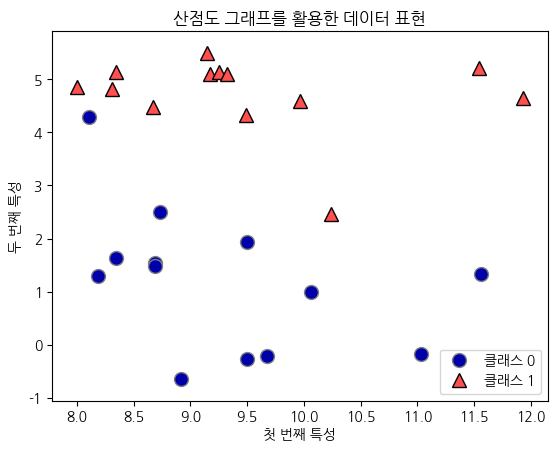

In [39]:
X, y = mglearn.datasets.make_forge()
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["클래스 0", "클래스 1"], loc=4) # 범례
plt.title("산점도 그래프를 활용한 데이터 표현") # 제목
plt.xlabel("첫 번째 특성") # 축
plt.ylabel("두 번째 특성") # 축
print(X.shape, y.shape)

Text(0, 0.5, '타킷')

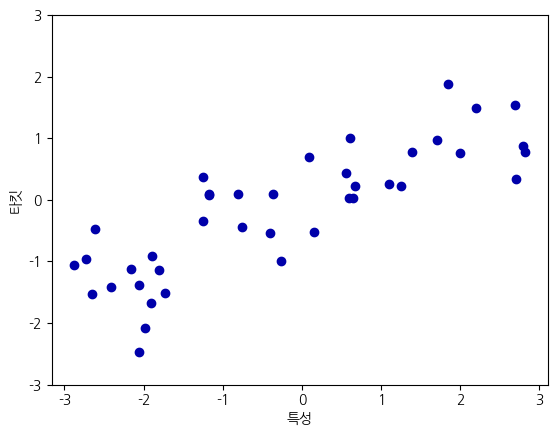

In [42]:
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X,y, 'o')
plt.ylim(-3, 3)
plt.xlabel("특성") # 축
plt.ylabel("타킷") # 축

In [44]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("cancer.keys():\n", cancer.keys())

cancer.keys():
 dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [45]:
X, y = mglearn.datasets.load_extended_boston()
print(X.shape, y.shape)

(506, 104) (506,)


## K-NN

KNeighborsClassifier(n_neighbors=3)

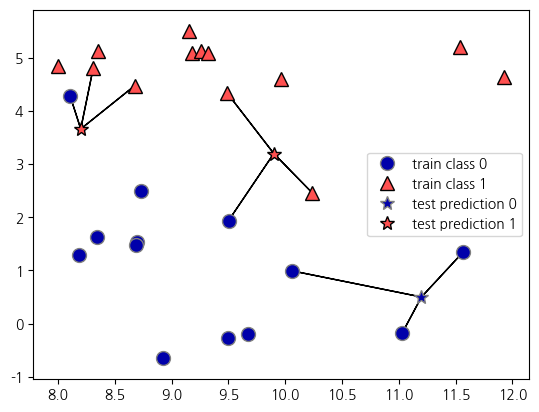

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
X, y = mglearn.datasets.make_forge()
X_train, X_test, y_train, y_test, = train_test_split(X, y, random_state=0)
mglearn.plots.plot_knn_classification(n_neighbors=3)
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)

### K-NN 모델 평가 및 확인

In [58]:
clf.score(X_test, y_test)

0.8571428571428571

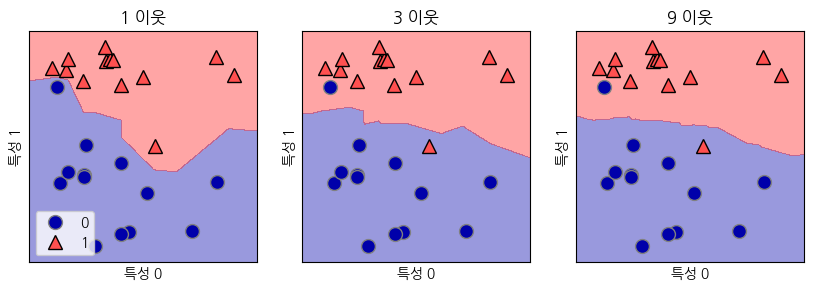

In [64]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} 이웃".format(n_neighbors))
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")
axes[0].legend(loc=3)

### 복잡한 데이터를 사용한 K-NN

In [65]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []
neighbors_setting = range(1, 11)

In [68]:
for n_neighbors in neighbors_setting:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    training_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))

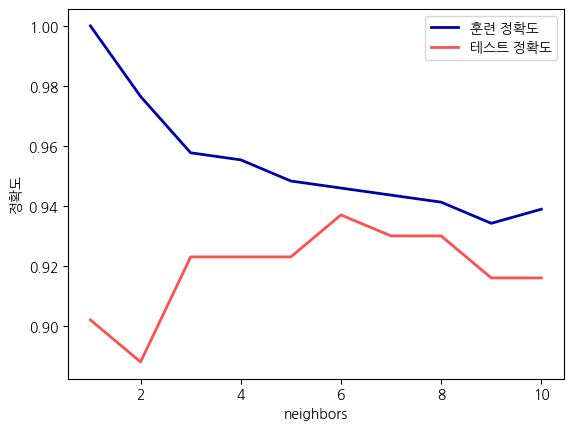

In [69]:
plt.plot(neighbors_setting, training_accuracy, label="훈련 정확도")
plt.plot(neighbors_setting, test_accuracy, label="테스트 정확도")
plt.ylabel("정확도")
plt.xlabel("neighbors")
plt.legend()

w[0]: 0.393906  b: -0.031804


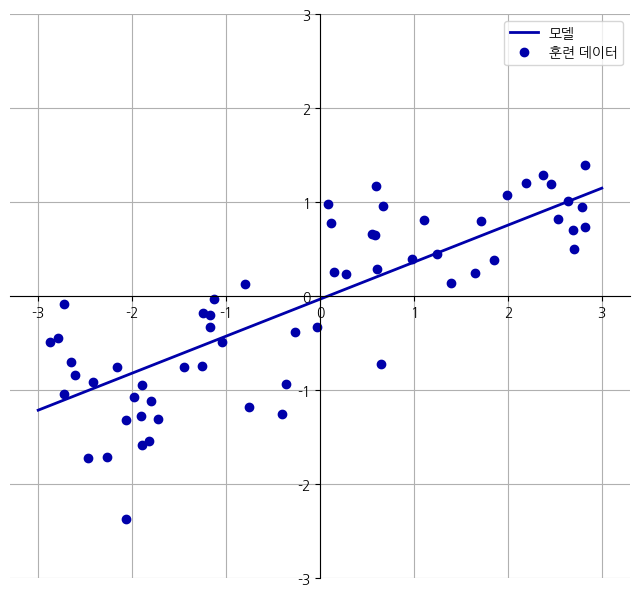

In [72]:
mglearn.plots.plot_linear_regression_wave()

In [74]:
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
lr = LinearRegression().fit(X_train, y_train)

In [77]:
print("lr.coef_:", lr.coef_)
print("lr.intercept_:", lr.intercept_)

lr.coef_: [0.394]
lr.intercept_: -0.031804343026759746


In [76]:
print(lr.score(X_train, y_train), lr.score(X_test, y_test))

0.6700890315075756 0.65933685968637


In [80]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
lr = LinearRegression().fit(X_train, y_train)

In [82]:
print(lr.score(X_train, y_train), lr.score(X_test, y_test))

0.9448313975211595 0.7758378393351646


### L2 규제

In [98]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
ridge = Ridge().fit(X_train, y_train)

In [99]:
print(ridge.score(X_train, y_train), ridge.score(X_test, y_test))

0.8700969775259919 0.8145421818415556


### L1 규제

In [102]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
lasso = Lasso(alpha=0.0001, max_iter=700000).fit(X_train, y_train)

In [103]:
print(lasso.score(X_train, y_train), lasso.score(X_test, y_test))

0.9435815252488567 0.8080525356174062
